In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, PercentFormatter)
import numpy as np
pd.set_option('display.max_rows', 50)

In [2]:
kalandra = pd.read_csv("Items/Kalandra.items.csv", sep = ";")
sentinel = pd.read_csv("Items/Sentinel.items.csv", sep = ";")
archnemesis = pd.read_csv("Items/Archnemesis.items.csv", sep = ";")
scourge = pd.read_csv("Items/Scourge.items.csv", sep = ";")

expedition = pd.read_csv("Items/Expedition.items.csv", sep = ";")
# ultimatum = pd.read_csv("Items/Ultimatum.items.csv", sep = ";")
# ritual = pd.read_csv("Items/Ritual.items.csv", sep = ";")

C:\Users\65978\AppData\Local\Temp\ipykernel_12300\2010413775.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  archnemesis = pd.read_csv("Items/Archnemesis.items.csv", sep = ";")
C:\Users\65978\AppData\Local\Temp\ipykernel_12300\2010413775.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  scourge = pd.read_csv("Items/Scourge.items.csv", sep = ";")
C:\Users\65978\AppData\Local\Temp\ipykernel_12300\2010413775.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  expedition = pd.read_csv("Items/Expedition.items.csv", sep = ";")


In [3]:
kalandra_houseOfMirror = kalandra.loc[kalandra['Name']=='House of Mirrors']
sentinel_houseOfMirror = sentinel.loc[sentinel['Name']=='House of Mirrors']
archnemesis_houseOfMirror = archnemesis.loc[archnemesis['Name']=='House of Mirrors']
scourge_houseOfMirror = scourge.loc[scourge['Name']=='House of Mirrors']

expedition_houseOfMirror = expedition.loc[expedition['Name']=='House of Mirrors']
# ultimatum_houseOfMirror = ultimatum.loc[ultimatum['Name']=='House of Mirrors']
# ritual_houseOfMirror = ritual.loc[ritual['Name']=='House of Mirrors']


# kalandra_houseOfMirror = kalandra_houseOfMirror[kalandra_houseOfMirror.Value < 250000]
# kalandra_houseOfMirror = kalandra_houseOfMirror[kalandra_houseOfMirror.Value > 1000]


In [4]:
kalandra_newID = kalandra_houseOfMirror.copy()
sentinel_newID = sentinel_houseOfMirror.copy()
archnemesis_newID = archnemesis_houseOfMirror.copy()
scourge_newID = scourge_houseOfMirror.copy()

expedition_newID = expedition_houseOfMirror.copy()
# ultimatum_newID = ultimatum_houseOfMirror.copy()
# ritual_newID = ritual_houseOfMirror.copy()


In [5]:
kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))

expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))


C:\Users\65978\AppData\Local\Temp\ipykernel_12300\2563983595.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


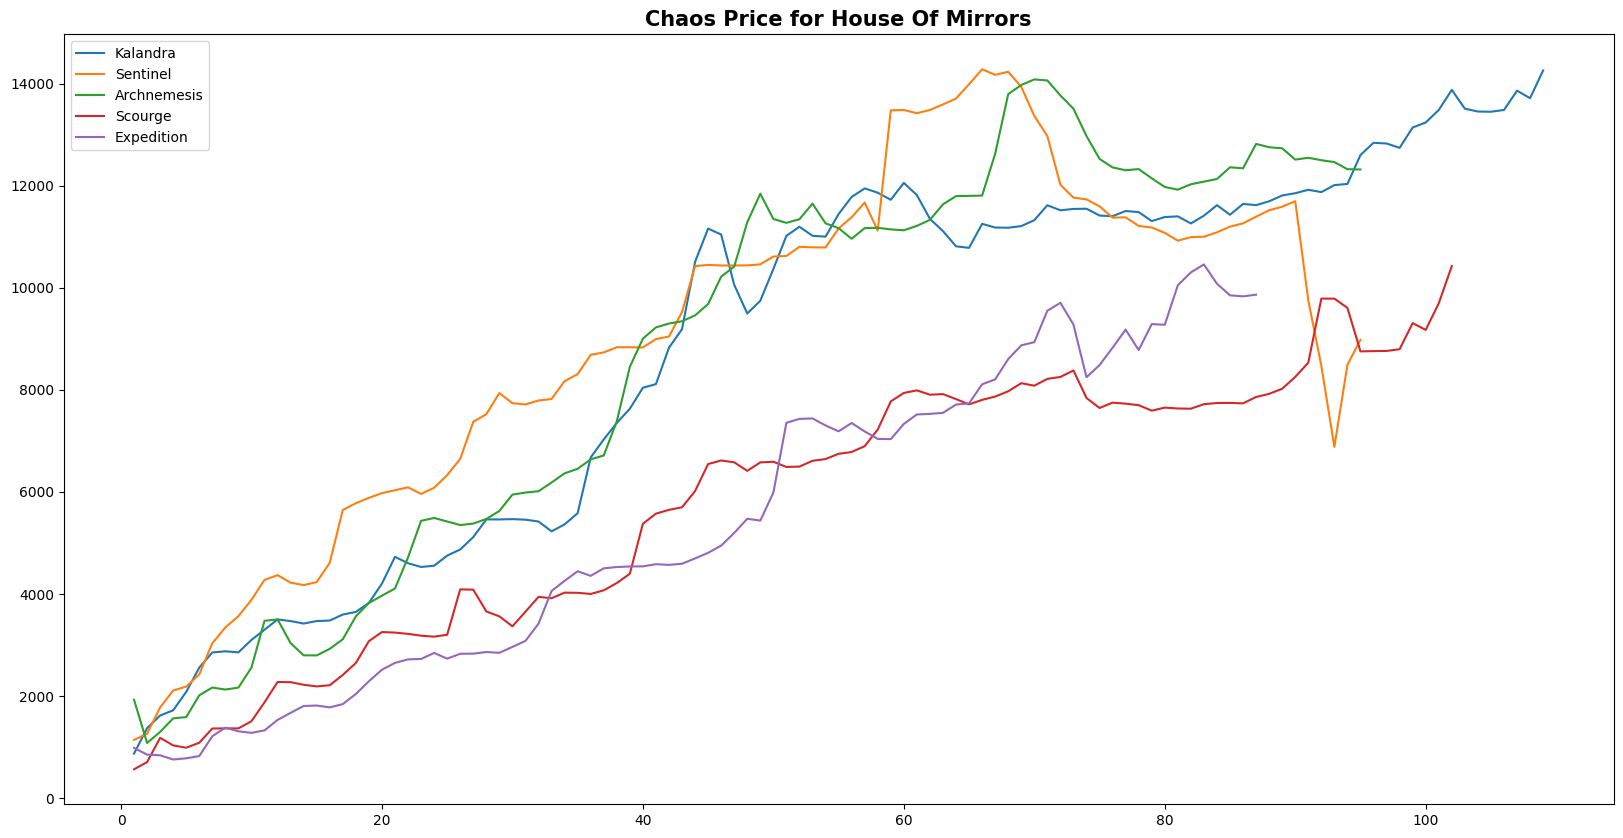

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for House Of Mirrors', fontsize=15,fontweight='bold')
ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')

ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
ax.legend()

fig.show()

In [7]:
kalandra_Ref1stDay = kalandra_houseOfMirror.copy()
sentinel_Ref1stDay = sentinel_houseOfMirror.copy()
archnemesis_Ref1stDay = archnemesis_houseOfMirror.copy()
scourge_Ref1stDay = scourge_houseOfMirror.copy()

expedition_Ref1stDay = expedition_houseOfMirror.copy()
# ultimatum_Ref1stDay = ultimatum_houseOfMirror.copy()
# ritual_Ref1stDay = ritual_houseOfMirror.copy()

In [8]:
def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration

    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# variations = archnemesis_Ref1stDay['Value'].expanding().apply(get_variation)
kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))

expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

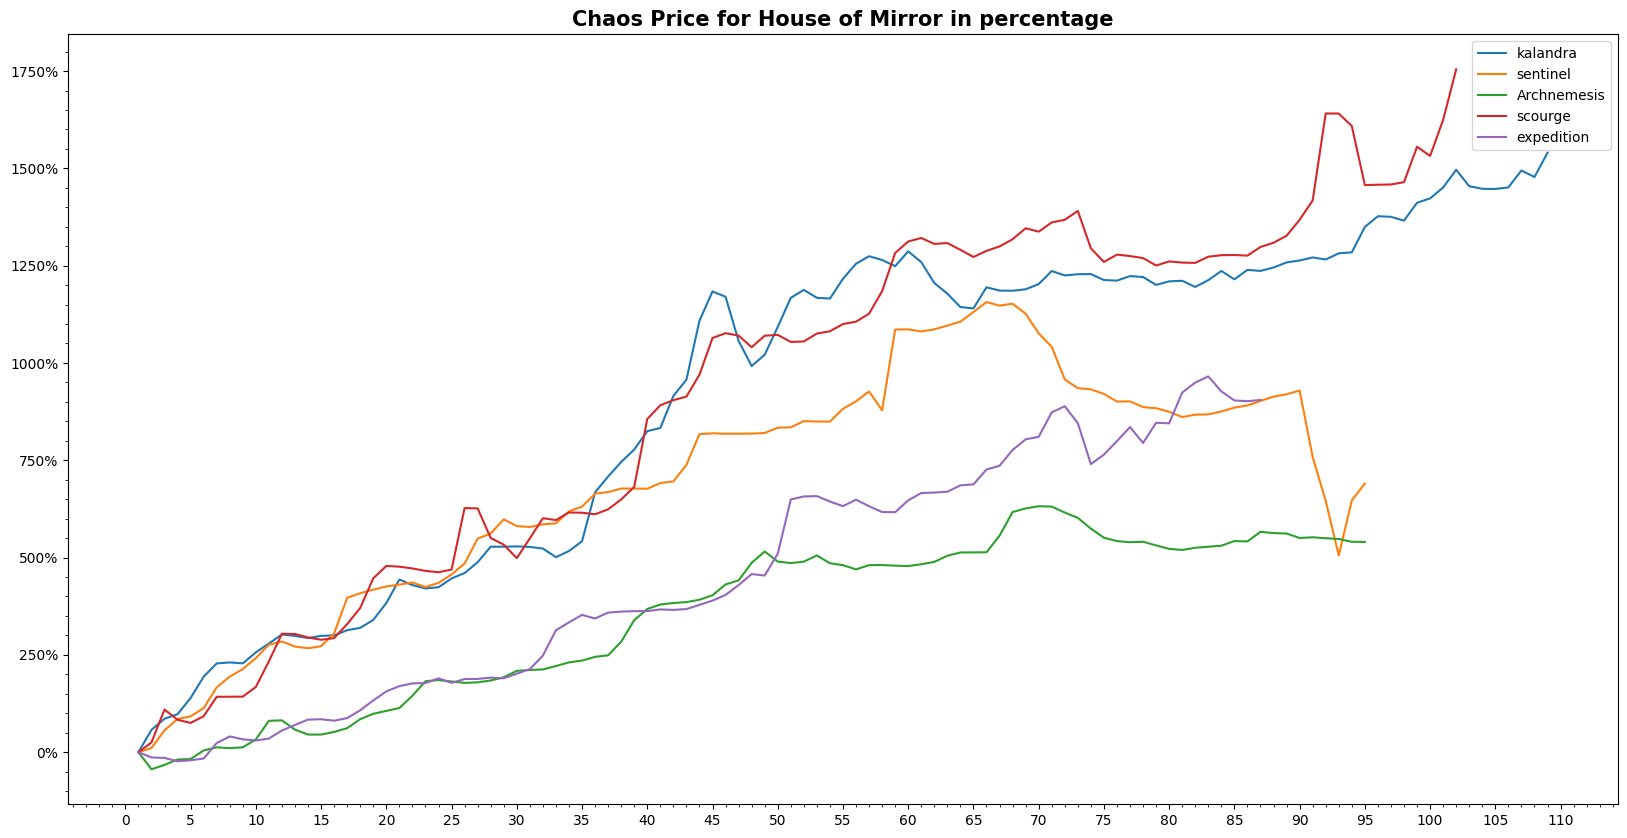

In [9]:

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for House of Mirrors in percentage', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')

ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
ax.legend()


C:\Users\65978\AppData\Local\Temp\ipykernel_12300\417203456.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


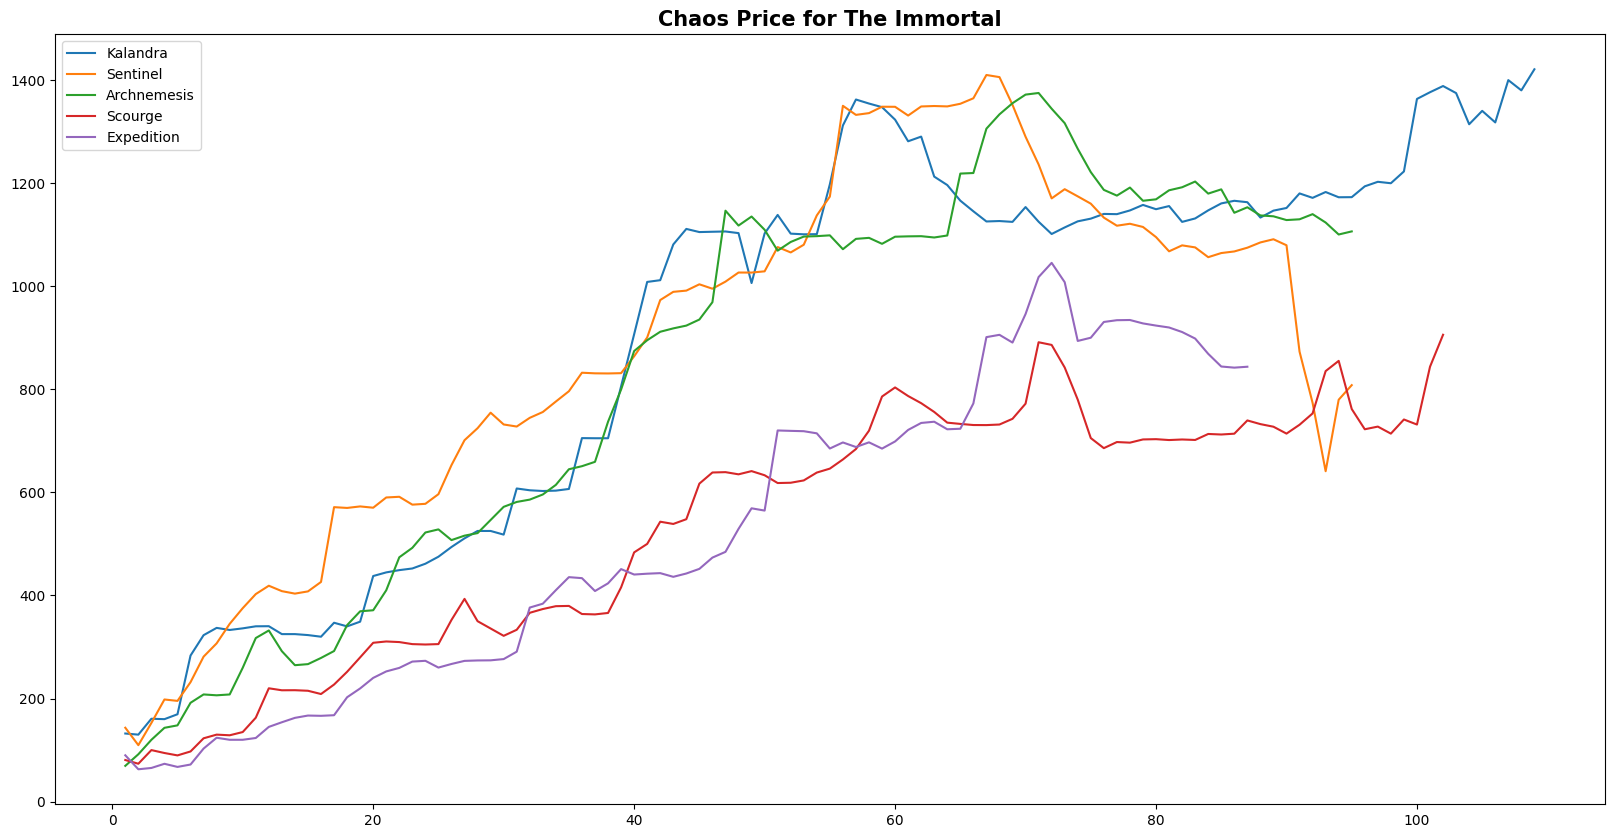

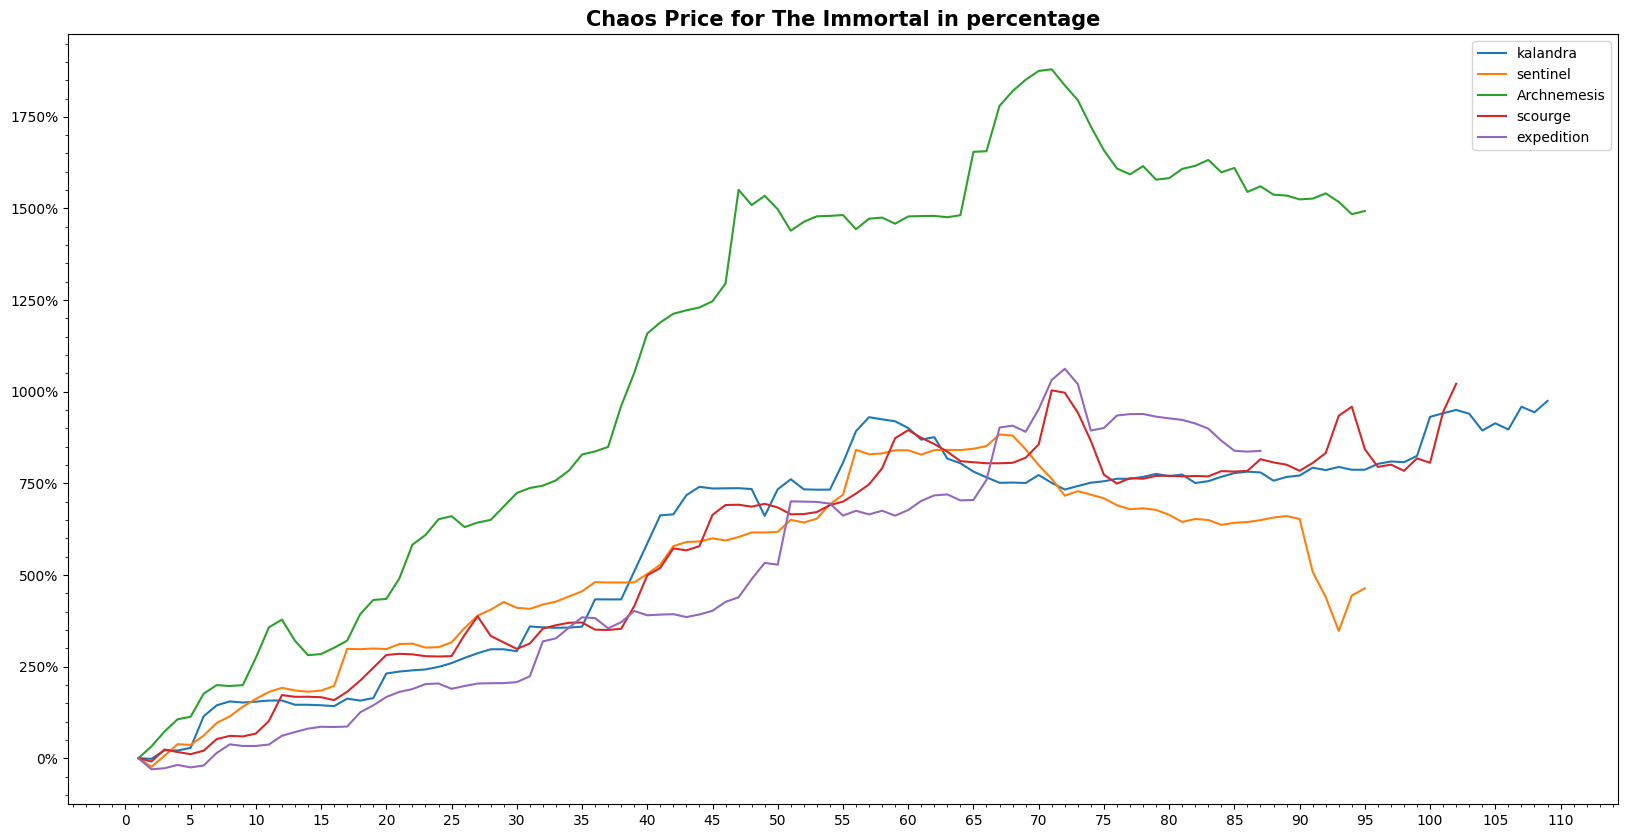

In [13]:
kalandra_TheImmortal = kalandra.loc[kalandra['Name']=='The Immortal']
sentinel_TheImmortal = sentinel.loc[sentinel['Name']=='The Immortal']
archnemesis_TheImmortal = archnemesis.loc[archnemesis['Name']=='The Immortal']
scourge_TheImmortal = scourge.loc[scourge['Name']=='The Immortal']

expedition_TheImmortal = expedition.loc[expedition['Name']=='The Immortal']
# ultimatum_TheImmortal = ultimatum.loc[ultimatum['Name']=='The Immortal']
# ritual_TheImmortal = ritual.loc[ritual['Name']=='The Immortal']


# kalandra_TheImmortal = kalandra_TheImmortal[kalandra_TheImmortal.Value < 250000]
# kalandra_TheImmortal = kalandra_TheImmortal[kalandra_TheImmortal.Value > 1000]

kalandra_newID = kalandra_TheImmortal.copy()
sentinel_newID = sentinel_TheImmortal.copy()
archnemesis_newID = archnemesis_TheImmortal.copy()
scourge_newID = scourge_TheImmortal.copy()

expedition_newID = expedition_TheImmortal.copy()
# ultimatum_newID = ultimatum_TheImmortal.copy()
# ritual_newID = ritual_TheImmortal.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))

expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for The Immortal', fontsize=15,fontweight='bold')
ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')

ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
ax.legend()

fig.show()
kalandra_Ref1stDay = kalandra_TheImmortal.copy()
sentinel_Ref1stDay = sentinel_TheImmortal.copy()
archnemesis_Ref1stDay = archnemesis_TheImmortal.copy()
scourge_Ref1stDay = scourge_TheImmortal.copy()

expedition_Ref1stDay = expedition_TheImmortal.copy()
# ultimatum_Ref1stDay = ultimatum_TheImmortal.copy()
# ritual_Ref1stDay = ritual_TheImmortal.copy()
def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration

    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# variations = archnemesis_Ref1stDay['Value'].expanding().apply(get_variation)
kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))

expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for The Immortal in percentage', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')

ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
ax.legend()


C:\Users\65978\AppData\Local\Temp\ipykernel_12300\4025614855.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


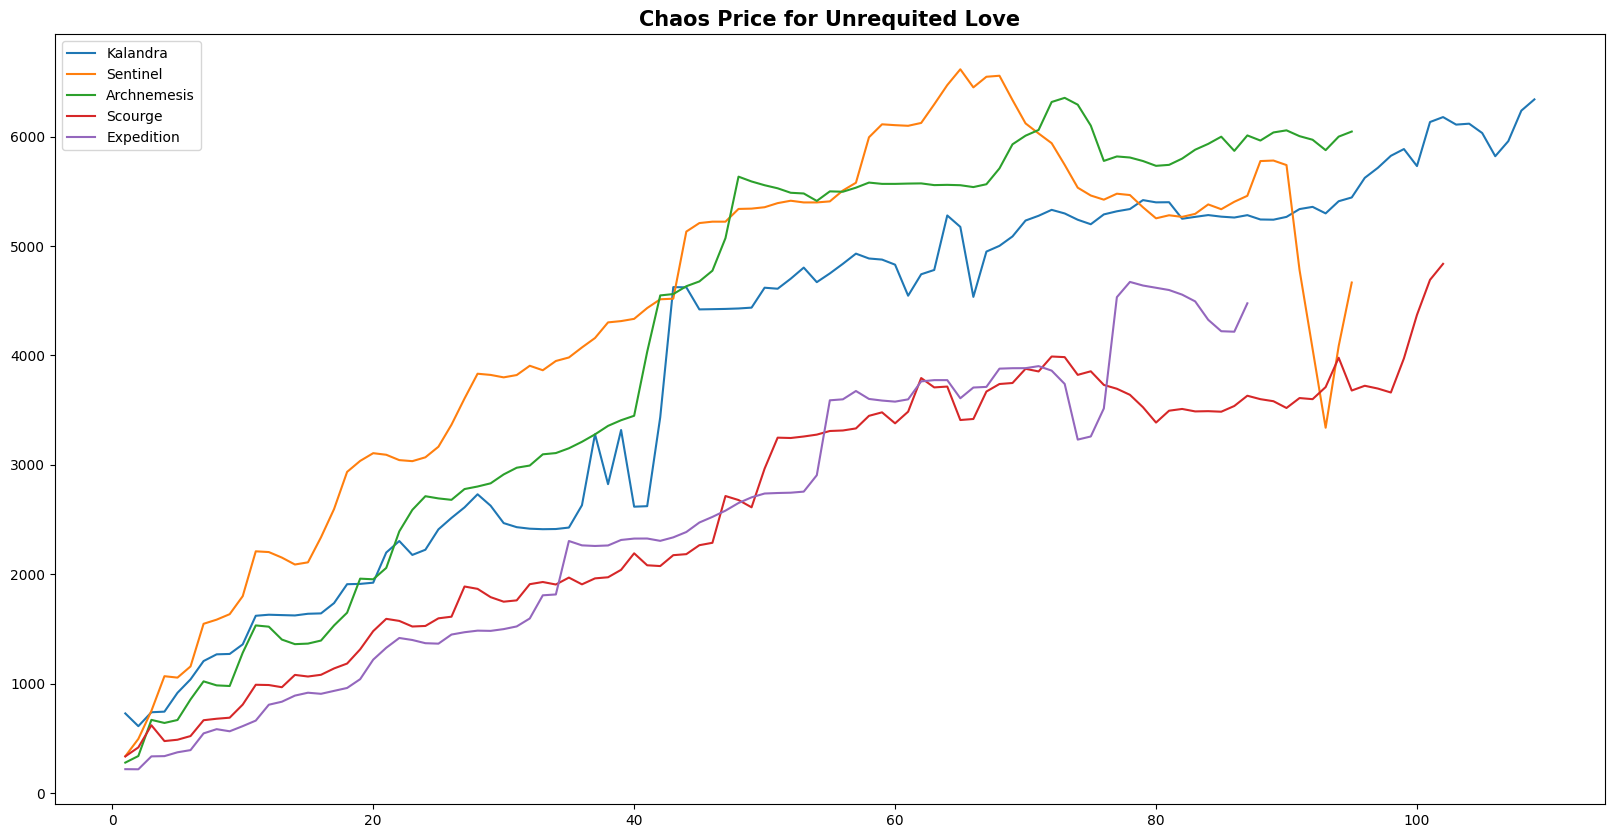

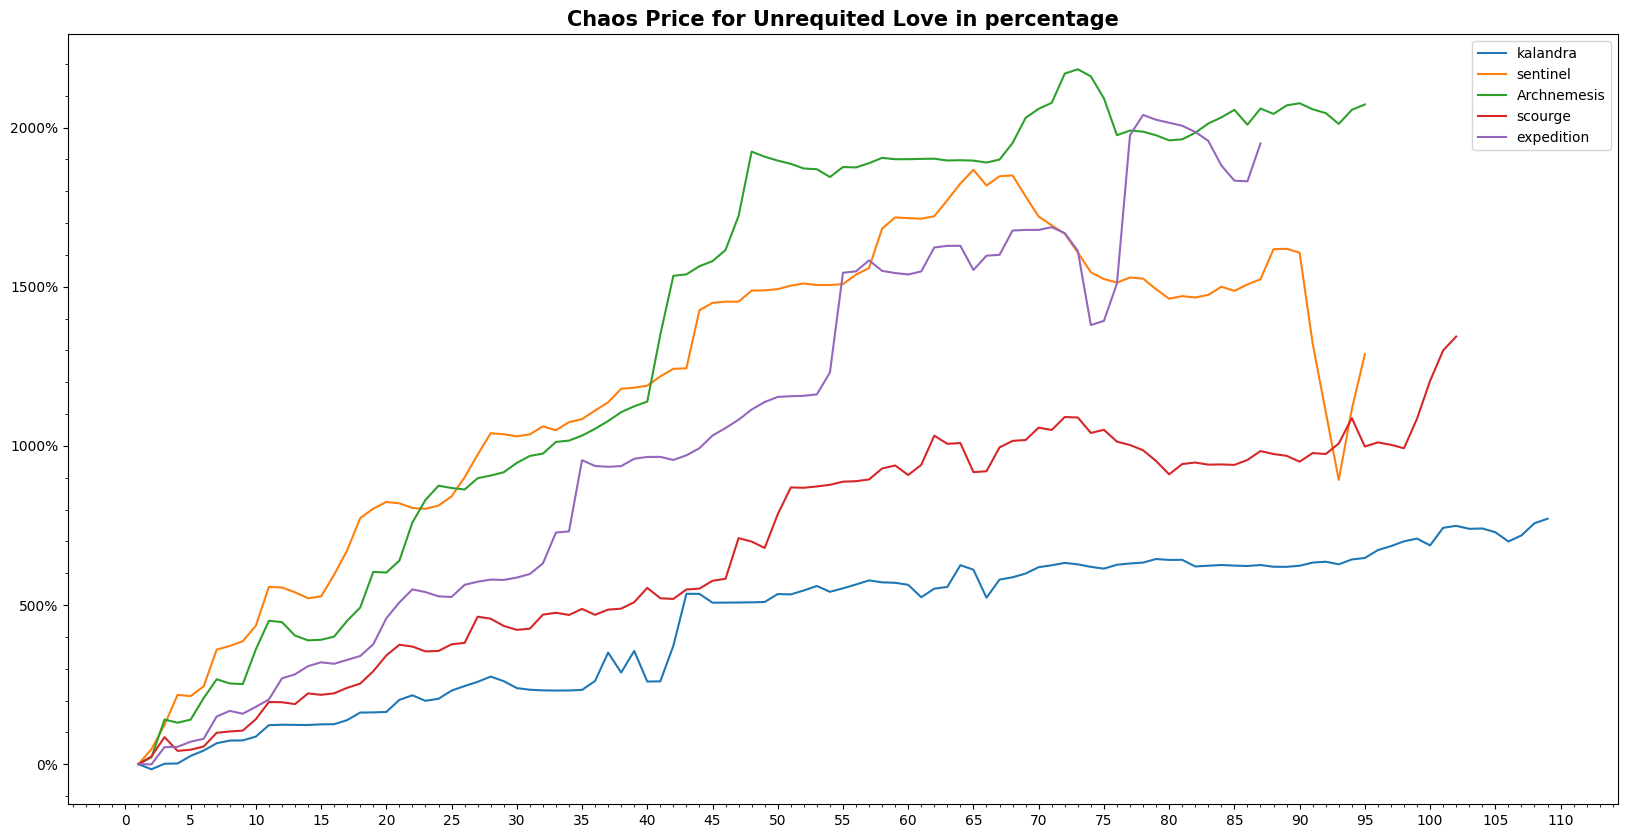

In [11]:
kalandra_unrequitedLove = kalandra.loc[kalandra['Name']=='Unrequited Love']
sentinel_unrequitedLove = sentinel.loc[sentinel['Name']=='Unrequited Love']
archnemesis_unrequitedLove = archnemesis.loc[archnemesis['Name']=='Unrequited Love']
scourge_unrequitedLove = scourge.loc[scourge['Name']=='Unrequited Love']

expedition_unrequitedLove = expedition.loc[expedition['Name']=='Unrequited Love']
# ultimatum_unrequitedLove = ultimatum.loc[ultimatum['Name']=='Unrequited Love']
# ritual_unrequitedLove = ritual.loc[ritual['Name']=='Unrequited Love']


# kalandra_unrequitedLove = kalandra_unrequitedLove[kalandra_unrequitedLove.Value < 250000]
# kalandra_unrequitedLove = kalandra_unrequitedLove[kalandra_unrequitedLove.Value > 1000]

kalandra_newID = kalandra_unrequitedLove.copy()
sentinel_newID = sentinel_unrequitedLove.copy()
archnemesis_newID = archnemesis_unrequitedLove.copy()
scourge_newID = scourge_unrequitedLove.copy()

expedition_newID = expedition_unrequitedLove.copy()
# ultimatum_newID = ultimatum_unrequitedLove.copy()
# ritual_newID = ritual_unrequitedLove.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))

expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for Unrequited Love', fontsize=15,fontweight='bold')
ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')

ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
ax.legend()

fig.show()
kalandra_Ref1stDay = kalandra_unrequitedLove.copy()
sentinel_Ref1stDay = sentinel_unrequitedLove.copy()
archnemesis_Ref1stDay = archnemesis_unrequitedLove.copy()
scourge_Ref1stDay = scourge_unrequitedLove.copy()

expedition_Ref1stDay = expedition_unrequitedLove.copy()
# ultimatum_Ref1stDay = ultimatum_unrequitedLove.copy()
# ritual_Ref1stDay = ritual_unrequitedLove.copy()
def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration

    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# variations = archnemesis_Ref1stDay['Value'].expanding().apply(get_variation)
kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))

expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for Unrequited Love in percentage', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')

ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
ax.legend()


C:\Users\65978\AppData\Local\Temp\ipykernel_12300\326748626.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


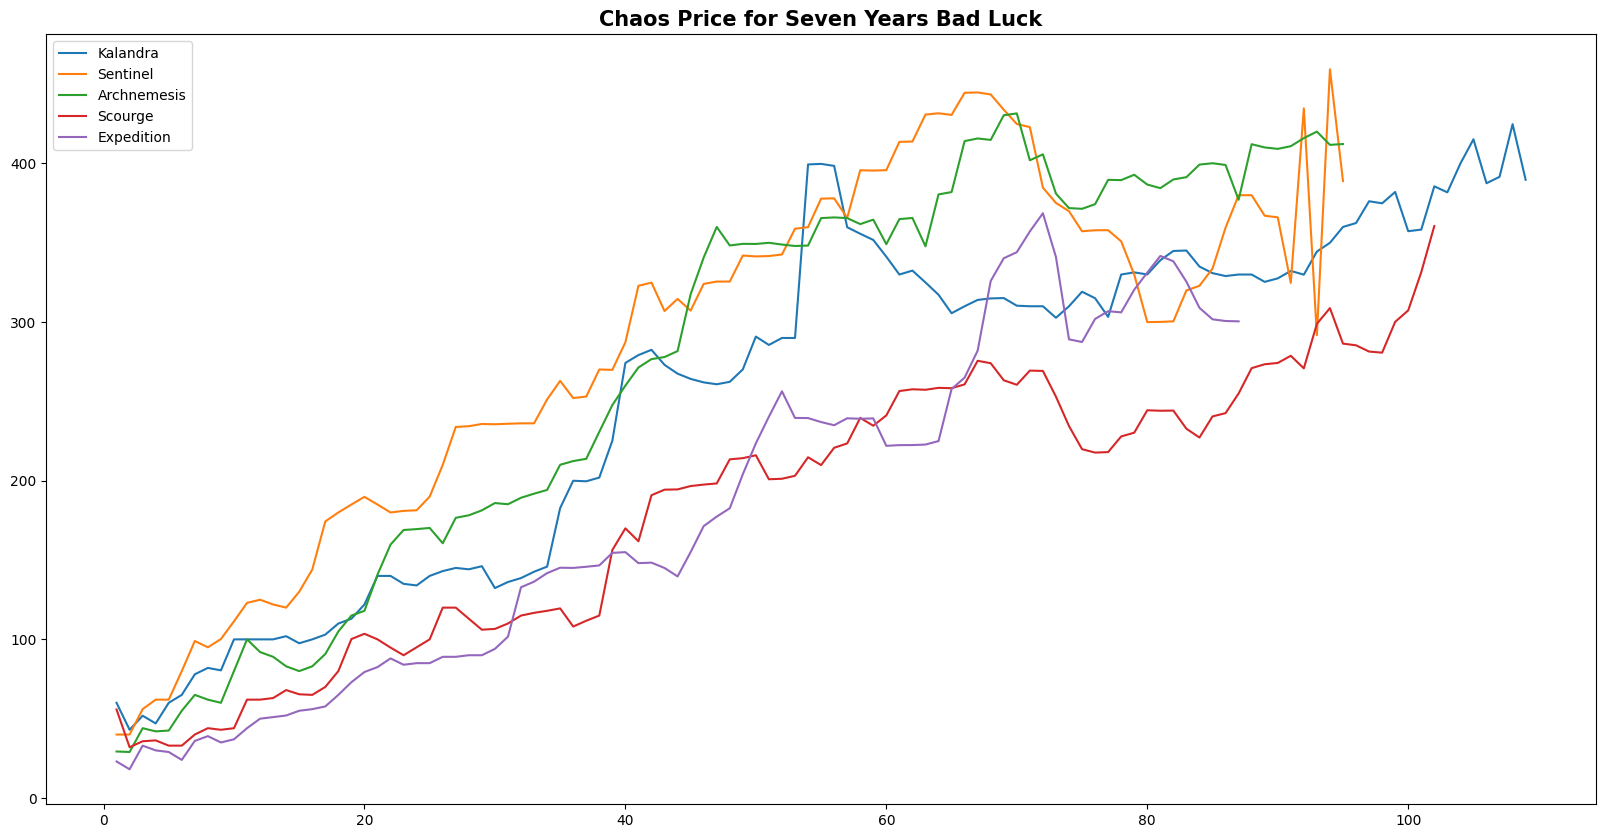

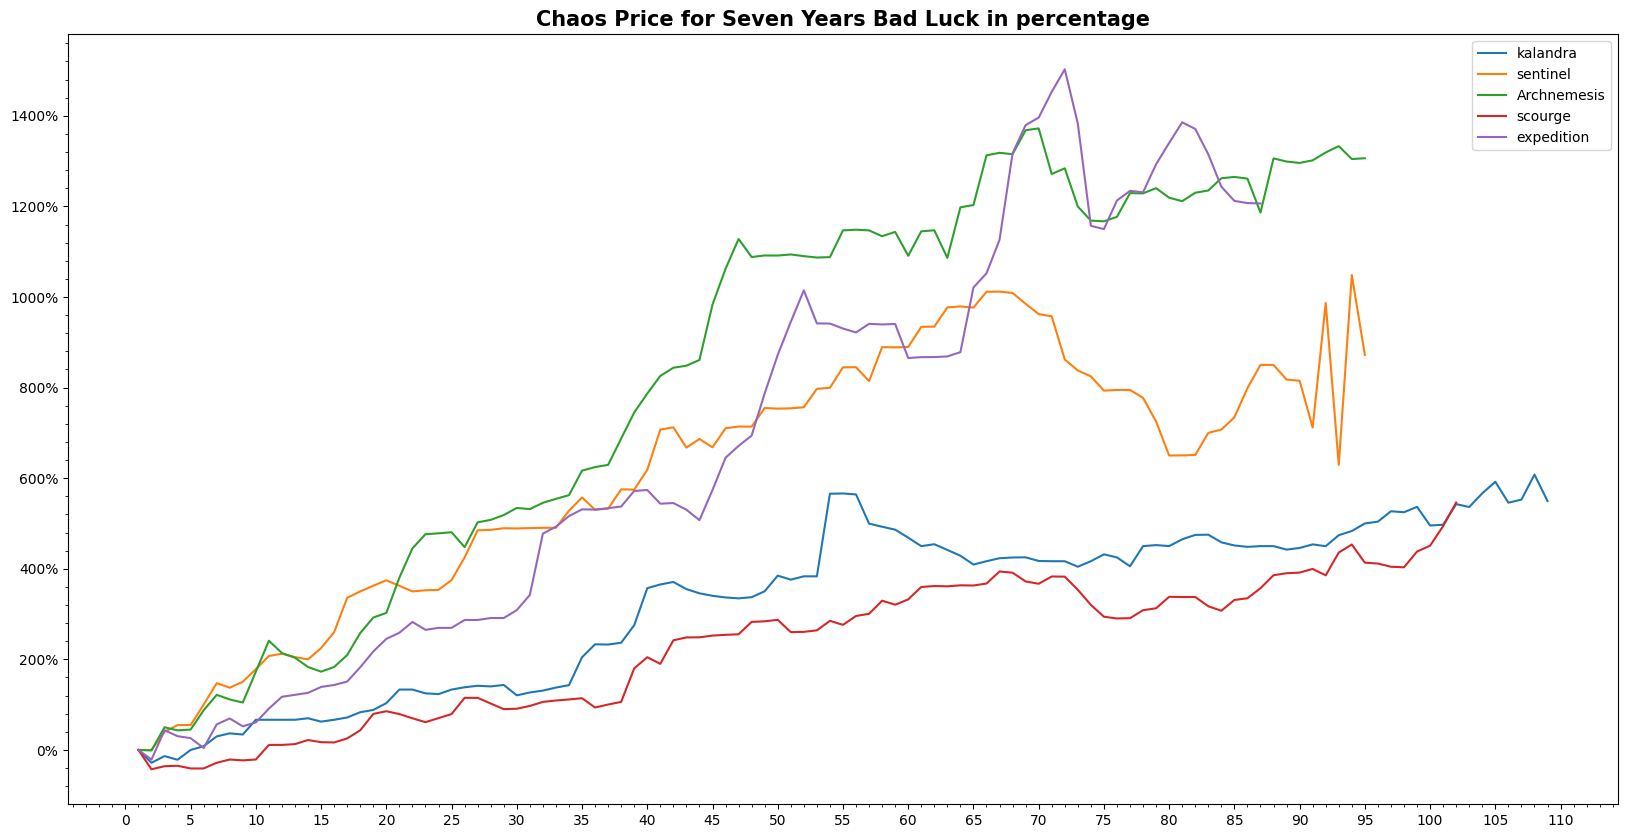

In [12]:
kalandra_sevenYearsBadLuck = kalandra.loc[kalandra['Name']=='Seven Years Bad Luck']
sentinel_sevenYearsBadLuck = sentinel.loc[sentinel['Name']=='Seven Years Bad Luck']
archnemesis_sevenYearsBadLuck = archnemesis.loc[archnemesis['Name']=='Seven Years Bad Luck']
scourge_sevenYearsBadLuck = scourge.loc[scourge['Name']=='Seven Years Bad Luck']

expedition_sevenYearsBadLuck = expedition.loc[expedition['Name']=='Seven Years Bad Luck']
# ultimatum_sevenYearsBadLuck = ultimatum.loc[ultimatum['Name']=='Seven Years Bad Luck']
# ritual_sevenYearsBadLuck = ritual.loc[ritual['Name']=='Seven Years Bad Luck']


# kalandra_sevenYearsBadLuck = kalandra_sevenYearsBadLuck[kalandra_sevenYearsBadLuck.Value < 250000]
# kalandra_sevenYearsBadLuck = kalandra_sevenYearsBadLuck[kalandra_sevenYearsBadLuck.Value > 1000]

kalandra_newID = kalandra_sevenYearsBadLuck.copy()
sentinel_newID = sentinel_sevenYearsBadLuck.copy()
archnemesis_newID = archnemesis_sevenYearsBadLuck.copy()
scourge_newID = scourge_sevenYearsBadLuck.copy()

expedition_newID = expedition_sevenYearsBadLuck.copy()
# ultimatum_newID = ultimatum_sevenYearsBadLuck.copy()
# ritual_newID = ritual_sevenYearsBadLuck.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))

expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for Seven Years Bad Luck', fontsize=15,fontweight='bold')
ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')

ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
ax.legend()

fig.show()
kalandra_Ref1stDay = kalandra_sevenYearsBadLuck.copy()
sentinel_Ref1stDay = sentinel_sevenYearsBadLuck.copy()
archnemesis_Ref1stDay = archnemesis_sevenYearsBadLuck.copy()
scourge_Ref1stDay = scourge_sevenYearsBadLuck.copy()

expedition_Ref1stDay = expedition_sevenYearsBadLuck.copy()
# ultimatum_Ref1stDay = ultimatum_sevenYearsBadLuck.copy()
# ritual_Ref1stDay = ritual_sevenYearsBadLuck.copy()
def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration

    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# variations = archnemesis_Ref1stDay['Value'].expanding().apply(get_variation)
kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))

expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for Seven Years Bad Luck in percentage', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')

ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
ax.legend()
